In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import r2_score

In [11]:
data=pd.read_csv("cleaning_data.csv")
data=data.drop("Unnamed: 0",axis=1)
data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,ExterQual_TA,BsmtQual_Ex,KitchenQual_Ex,KitchenQual_TA,ExterQual_Ex,Foundation_CBlock,GarageFinish_Fin
0,7,2003,2003,856.00,856.00,1710.00,2,8.00,2.00,548.00,208500.00,0,0,0,0,0,0,0
1,6,1976,1976,1262.00,1262.00,1262.00,2,6.00,2.00,460.00,181500.00,1,0,0,1,0,1,0
2,7,2001,2002,920.00,920.00,1786.00,2,6.00,2.00,608.00,223500.00,0,0,0,0,0,0,0
3,7,1915,1970,756.00,961.00,1717.00,1,7.00,3.00,642.00,140000.00,1,0,0,0,0,0,0
4,8,2000,2000,1145.00,1145.00,2198.00,2,9.00,3.00,836.00,250000.00,0,0,0,0,0,0,0


In [3]:
#Division of data as x and y
x=data.drop("SalePrice",axis=1).values
y=data["SalePrice"].values

In [4]:
#dividing data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
#standardization of data
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [6]:
#Create the table with statsmodels
model_sm=sm.OLS(y,sm.add_constant(x)).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     506.1
Date:                Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:27:17   Log-Likelihood:                -16883.
No. Observations:                1460   AIC:                         3.380e+04
Df Residuals:                    1442   BIC:                         3.390e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.628e+05   9.82e+04     -9.806      0.000   -1.16e+06    -7.7e+05
x1          1.149e+04    879.082     13.065      0.000    9760.779    1.32e+04
x2           235.3165     35.626      6.605      0.000     165.433     305.200
x3           249.5285     46.070      5.416      0.000     159.158     339.899
x4            24.5359      3.157      7.772      0.000      18.343      30.729
x5             5.6651      3.477      1.629      0.103      -1.155      12.485
x6            56.8359      3.188     17.826      0.000      50.581      63.090
x7         -5555.2150   1848.387     -3.005      0.003   -9181.030   -1929.400
x8         -2414.4074    822.925     -2.934      0.003   -4028.666    -800.148
x9          4375.3878   2189.558      1.998      0.046      80.328    8670.448
x10           25.7624      7.535      3.419      0.001      10.981      40.544
x11        -4851.9038   2246.081     -2.160      0.031   -9257.841    -445.967
x12         1.766e+04   3240.224      5.451      0.000    1.13e+04     2.4e+04
x13         1.334e+04   3505.738      3.805      0.000    6460.854    2.02e+04
x14        -8087.7123   1969.605     -4.106      0.000    -1.2e+04   -4224.114
x15        -1236.5771   4712.083     -0.262      0.793   -1.05e+04    8006.694
x16         2411.6786   1684.095      1.432      0.152    -891.861    5715.218
x17         5532.0483   1814.997      3.048      0.002    1971.732    9092.365
==============================================================================
Omnibus:                      303.595   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3290.924
Skew:                          -0.640   Prob(JB):                         0.00
Kurtosis:                      10.243   Cond. No.                     5.26e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

100%|██████████| 42/42 [00:15<00:00,  2.66it/s]


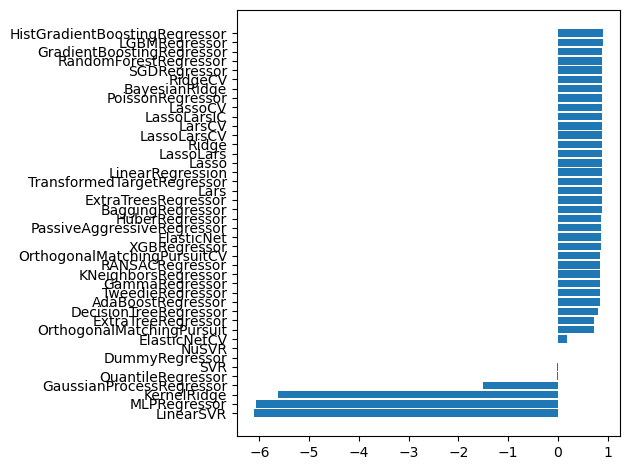

In [7]:
#Determining the model that gives the high r2 value with lazy predict
clf=LazyRegressor()
models,predict=clf.fit(x_train,x_test,y_train,y_test)
sort=models.sort_values(by="R-Squared")
plt.barh(sort.index,sort["R-Squared"])
plt.tight_layout()
plt.show()

In [8]:
#hiperparametre ayarı ve en yüksek r2 sonucu verdiği için gradint boosting kullandım
#I used gradint boosting because hyperparameter setting and it gives the highest r2 result



params= {
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "n_estimators": [50, 100, 200],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

gbr= GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

grid_search = GridSearchCV(gbr, param_grid=params, cv=5)

grid_search.fit(x_train, y_train)

gbr_2=GradientBoostingRegressor(learning_rate=grid_search.best_params_["learning_rate"],
                                max_depth=grid_search.best_params_["max_depth"],
                                n_estimators=grid_search.best_params_["n_estimators"],
                                min_samples_split=grid_search.best_params_["min_samples_split"],
                                min_samples_leaf=grid_search.best_params_["min_samples_leaf"])

gbr_2.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, min_samples_split=5,
                          n_estimators=50)

In [12]:
#I measured the success of the model
y_pred=gbr_2.predict(x_test)
r2_gbr=r2_score(y_test,y_pred)
print(r2_gbr)

0.8972645439131633


In [13]:
scores = -1 * cross_val_score(gbr_2, x, y, cv=5, scoring='neg_mean_squared_error')
print(scores.mean()*100)

61084819174.36781


In [14]:
#saving the model
import pickle 
filename="model.pickle"
pickle.dump(gbr_2,open(filename,"wb"))